In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['font.size'] = 12

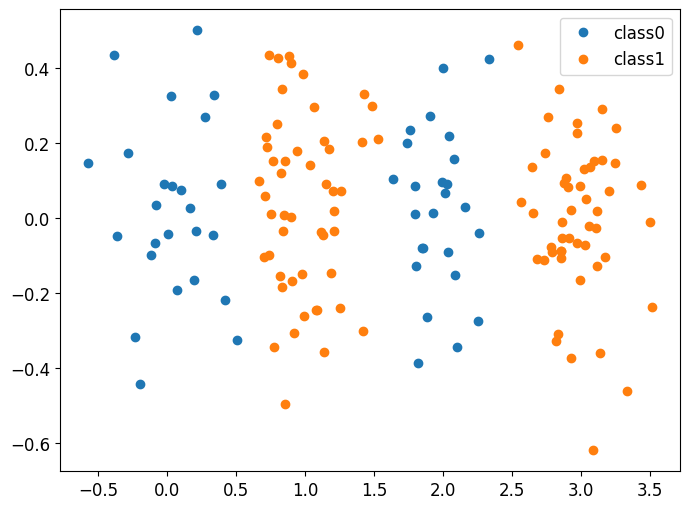

In [2]:
import numpy as np
np.random.seed(0)

m00 = np.array([0, 0])
m01 = np.array([2, 0])
m10 = np.array([1, 0])
m11 = np.array([3, 0])
s = 0.05

x00 = np.random.multivariate_normal(m00, np.eye(2)*s, 25)
x01 = np.random.multivariate_normal(m01, np.eye(2)*s, 25)
x0 = np.vstack((x00, x01))
x10 = np.random.multivariate_normal(m10, np.eye(2)*s, 50)
x11 = np.random.multivariate_normal(m11, np.eye(2)*s, 50)
x1 = np.vstack((x10, x11))

plt.plot(x0[:, 0], x0[:, 1], 'o', label='class0')
plt.plot(x1[:, 0], x1[:, 1], 'o', label='class1')
plt.legend()

In [3]:
y0 = np.zeros(x0.shape[0])
y1 = np.ones(x1.shape[0])
X = np.vstack((x0, x1))
y = np.hstack((y0, y1)).astype(int)

In [4]:
from sklearn.metrics import classification_report
from anynaivebayes import AnyNaiveBayesClassifier, IndependentSKLearnKDE


model = AnyNaiveBayesClassifier(distribution_factory=IndependentSKLearnKDE).fit(X, y)
y_pred = model.predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        50
           1       0.99      0.99      0.99       100

    accuracy                           0.99       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.99      0.99      0.99       150



In [5]:
# compare with gaussian naive bayes
from sklearn.naive_bayes import GaussianNB

model = GaussianNB().fit(X, y)
y_pred = model.predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.50      0.58        50
           1       0.78      0.89      0.83       100

    accuracy                           0.76       150
   macro avg       0.74      0.70      0.71       150
weighted avg       0.75      0.76      0.75       150

